In [0]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import datetime as dt
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings('ignore')

## Reading and cleaning the date

In [4]:
from google.colab import files
uploaded= files.upload()

Saving Country-data.csv to Country-data.csv


In [13]:
import io
df= pd.read_csv(io.StringIO(uploaded['Country-data.csv'].decode('utf-8')))
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [102]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
df.income = df.income.astype(float)
df.gdpp = df.gdpp.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


In [17]:
df.duplicated('country')

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

### Check for Null values

In [18]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [19]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Check correlation of the data

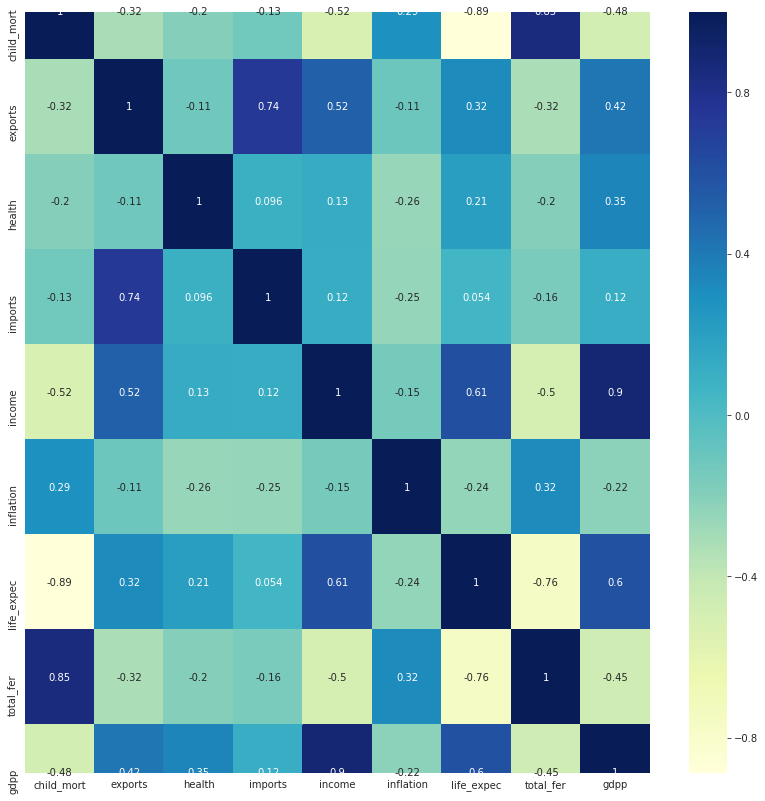

In [85]:
plt.figure(figsize = (14, 14))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('Correlation')
plt.show()

### Visualise the data using box plot to check for outliers.

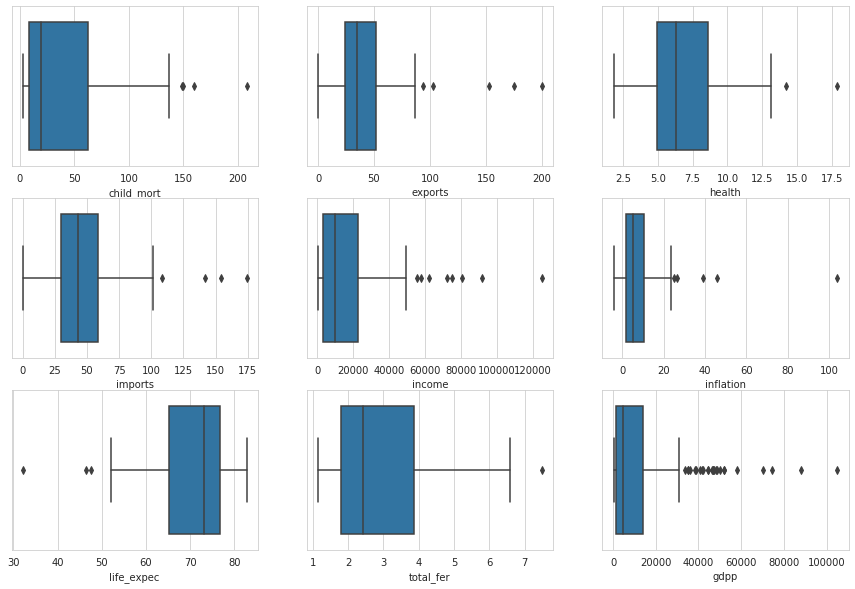

In [101]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['exports'], ax = axs[0,1])
plt3 = sns.boxplot(df['health'], ax = axs[0,2])
plt4 = sns.boxplot(df['imports'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['life_expec'], ax = axs[2,0])
plt8 = sns.boxplot(df['total_fer'], ax = axs[2,1])
plt9 = sns.boxplot(df['gdpp'], ax = axs[2,2])


In [103]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Outlier Treatment.

In [0]:
# outlier treatment for child mortality
Q1= df.child_mort.quantile(0.05)
Q3= df.child_mort.quantile(0.95)
IQR= Q3-Q1
df= df[(df.child_mort>= Q1-1.5*IQR) & (df.child_mort<= Q3+1.5*IQR)]

# outlier treatment for exports
Q1= df.exports.quantile(0.05)
Q3= df.exports.quantile(0.95)
IQR= Q3-Q1
df= df[(df.exports>= Q1-1.5*IQR) & (df.exports<= Q3+1.5*IQR)]

# outlier treatment for health
Q1= df.health.quantile(0.05)
Q3= df.health.quantile(0.95)
IQR= Q3-Q1
df= df[(df.health>= Q1-1.5*IQR) & (df.health<= Q3+1.5*IQR)]

# outlier treatment for imports
Q1= df.imports.quantile(0.05)
Q3= df.imports.quantile(0.95)
IQR= Q3-Q1
df= df[(df.imports>= Q1-1.5*IQR) & (df.imports<= Q3+1.5*IQR)]

# outlier treatment for income
Q1= df.income.quantile(0.05)
Q3= df.income.quantile(0.95)
IQR= Q3-Q1
df= df[(df.income>= Q1-1.5*IQR) & (df.income<= Q3+1.5*IQR)]

# outlier treatment for inflation
Q1= df.inflation.quantile(0.05)
Q3= df.inflation.quantile(0.95)
IQR= Q3-Q1
df= df[(df.inflation>= Q1-1.5*IQR) & (df.inflation<= Q3+1.5*IQR)]

# outlier treatment for life_expec
Q1= df.life_expec.quantile(0.05)
Q3= df.life_expec.quantile(0.95)
IQR= Q3-Q1
df= df[(df.life_expec>= Q1-1.5*IQR) & (df.life_expec<= Q3+1.5*IQR)]

# outlier treatment for total fertility rates
Q1= df.total_fer.quantile(0.05)
Q3= df.total_fer.quantile(0.95)
IQR= Q3-Q1
df= df[(df.total_fer>= Q1-1.5*IQR) & (df.total_fer<= Q3+1.5*IQR)]

# outlier treatment for GDP
Q1= df.gdpp.quantile(0.05)
Q3= df.gdpp.quantile(0.95)
IQR= Q3-Q1
df= df[(df.gdpp>= Q1-1.5*IQR) & (df.gdpp<= Q3+1.5*IQR)]

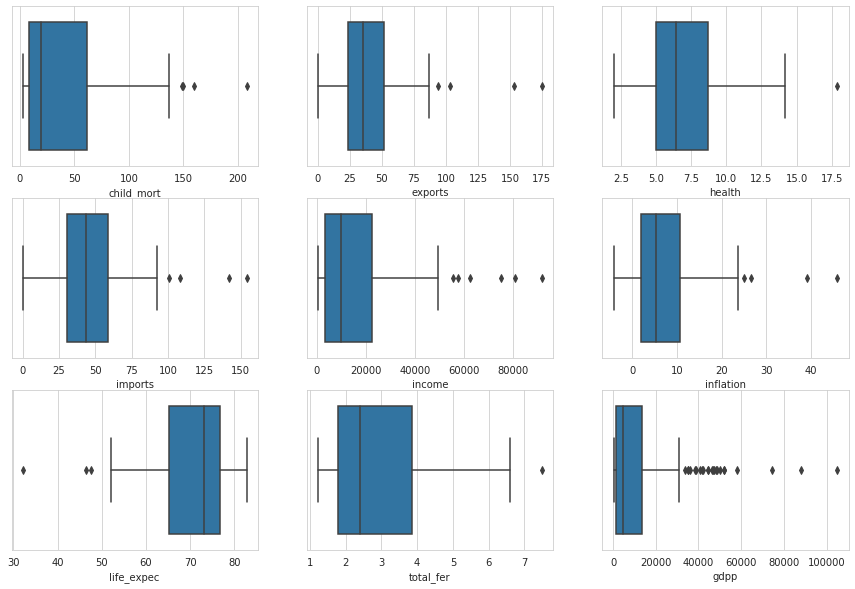

In [110]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['exports'], ax = axs[0,1])
plt3 = sns.boxplot(df['health'], ax = axs[0,2])
plt4 = sns.boxplot(df['imports'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['life_expec'], ax = axs[2,0])
plt8 = sns.boxplot(df['total_fer'], ax = axs[2,1])
plt9 = sns.boxplot(df['gdpp'], ax = axs[2,2])

In [111]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,38.105488,40.107311,6.874268,46.435768,16225.079268,7.247756,70.488415,2.946646,12474.292683
std,39.896529,24.598063,2.730949,22.112332,16936.812864,7.505487,8.861355,1.502677,17722.307006
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.230000,231.000000
25%,8.425000,23.725000,4.960000,30.625000,3335.000000,1.830000,65.300000,1.797500,1310.000000
50%,19.500000,35.000000,6.400000,43.300000,9950.000000,5.265000,73.100000,2.410000,4635.000000
75%,62.050000,51.225000,8.670000,58.675000,22400.000000,10.675000,76.725000,3.865000,13500.000000
max,208.000000,175.000000,17.900000,154.000000,91700.000000,45.900000,82.800000,7.490000,105000.000000


In [112]:
y= df.pop("country")
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Scaling of the  Data.

In [0]:
scaler= StandardScaler()

In [0]:
x= df.copy()
x= scaler.fit_transform(x)

In [0]:
from sklearn.decomposition import PCA
pca= PCA()

In [122]:
pca= PCA(random_state= 42)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [123]:
pca.components_

array([[-0.41707142,  0.26416786,  0.18768908,  0.13037811,  0.41046939,
        -0.19325685,  0.42525158, -0.4006349 ,  0.39605627],
       [ 0.16626965,  0.60959466, -0.14025508,  0.71387142, -0.01780182,
        -0.06583848, -0.2178763 ,  0.13068815, -0.04757916],
       [-0.17969762,  0.23818157, -0.67428713, -0.17159462,  0.1205389 ,
         0.60477777,  0.15830297, -0.11626924, -0.08947802],
       [ 0.34764414,  0.09856524,  0.19229972, -0.17589757,  0.47140389,
         0.33594745, -0.18172433,  0.38900432,  0.531111  ],
       [-0.18183315, -0.01302907,  0.60352928,  0.2518542 , -0.19656821,
         0.67595776,  0.05069234, -0.10140126, -0.17515404],
       [ 0.21153109, -0.04075914,  0.00361447, -0.05029309,  0.15419872,
         0.05496542, -0.60272783, -0.74866795,  0.02162972],
       [-0.06947963, -0.68136406, -0.28952827,  0.57355282,  0.08180463,
         0.11899188,  0.00187661,  0.01061626,  0.31170314],
       [ 0.72455736,  0.01039262, -0.0157946 ,  0.05284916, -0

In [0]:
import matplotlib.pyplot as plt

In [128]:
pca.explained_variance_ratio_

array([0.46176255, 0.1699294 , 0.13516563, 0.10906535, 0.06795329,
       0.0254524 , 0.01460331, 0.00919995, 0.00686812])

<BarContainer object of 9 artists>

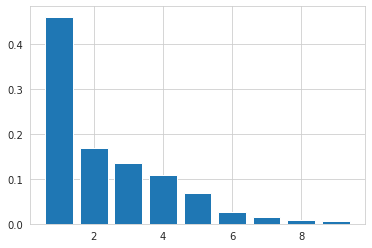

In [146]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

## Scree plot

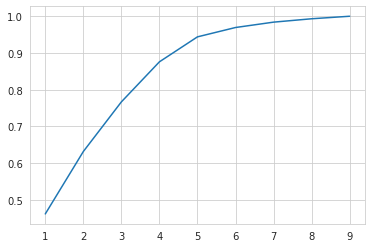

In [147]:
var_cumu= np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(var_cumu)+1), var_cumu)

### From the above scree plot, number of optimal clusters are taken as -4

In [150]:
pc4= PCA(n_components= 4, random_state= 42)
new_df= pc4.fit_transform(x)
new_df.shape

(164, 4)

In [155]:
df1= pd.DataFrame(new_df, columns= ['PC1', 'PC2', 'PC3', 'PC4'])
df1.head()

,PC1,PC2,PC3,PC4
0,-2.966365,0.014543,-1.036420,0.768485
1,0.442288,-0.507039,0.022429,-1.284641
2,-0.365026,-0.641205,1.663468,-0.247008
3,-3.109768,1.420818,1.634979,1.711483
4,1.101124,0.286844,0.019053,-0.911061


In [196]:
df_final= pd.concat([df1, y], axis=1)
df_final.head(10)

,PC1,PC2,PC3,PC4,cluster_id,country
0,-2.966365,0.014543,-1.036420,0.768485,2.0,Afghanistan
1,0.442288,-0.507039,0.022429,-1.284641,1.0,Albania
2,-0.365026,-0.641205,1.663468,-0.247008,0.0,Algeria
3,-3.109768,1.420818,1.634979,1.711483,2.0,Angola
4,1.101124,0.286844,0.019053,-0.911061,1.0,Antigua and Barbuda
5,-0.007720,-1.972770,1.106064,0.395554,0.0,Argentina
6,-0.156576,-0.621488,0.693473,-1.322962,0.0,Armenia
7,2.586398,-2.018285,-0.534401,1.075981,3.0,Australia
8,3.244472,-0.474847,-0.971649,0.934598,3.0,Austria
9,-0.195032,-0.519665,1.195847,0.052173,0.0,Azerbaijan


## Clustering- Using KMeans

In [189]:
kmeans= KMeans(n_clusters=4, max_iter=50)
kmeans.fit(x)
kmeans.labels_

array([2, 3, 1, 2, 3, 1, 1, 0, 0, 1, 3, 3, 1, 3, 3, 0, 3, 2, 3, 1, 3, 2,
       1, 0, 3, 2, 2, 3, 2, 0, 3, 2, 2, 1, 1, 1, 2, 2, 2, 3, 2, 3, 0, 3,
       0, 1, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 2, 3, 0, 2, 0, 3, 1, 2, 2, 3,
       2, 3, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 3, 1, 2, 2, 0, 3, 2, 3, 3, 2,
       2, 1, 3, 0, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 1, 3, 3, 2, 1, 2, 1,
       0, 0, 2, 0, 1, 2, 3, 3, 1, 1, 3, 0, 3, 1, 2, 3, 1, 2, 3, 3, 2, 3,
       3, 3, 2, 3, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 2, 3, 3, 1, 3, 2, 3,
       0, 0, 0, 1, 1, 3, 1, 3, 1, 2], dtype=int32)

## Finding optimal number of clusters

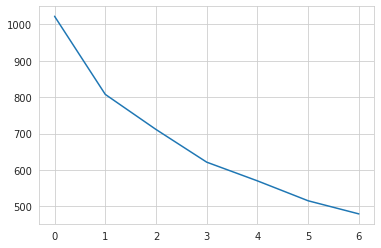

In [190]:
  # 1. Elbow Curve/ SSD (sum of square distances)
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=clusters, max_iter=50)
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [191]:
# 2. Silhouette analysis.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=clusters, max_iter=50)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For clusters={0}, the silhouette score is {1}".format(clusters, silhouette_avg))

For clusters=2, the silhouette score is 0.27914952214646455
For clusters=3, the silhouette score is 0.2719248540942326
For clusters=4, the silhouette score is 0.23313895634069706
For clusters=5, the silhouette score is 0.2427445866610327
For clusters=6, the silhouette score is 0.2267154168842608
For clusters=7, the silhouette score is 0.24510374486196276
For clusters=8, the silhouette score is 0.2397762702619471


In [192]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [193]:
kmeans.labels_

array([1, 3, 2, 1, 3, 2, 2, 0, 0, 2, 3, 3, 2, 3, 3, 0, 3, 1, 3, 2, 3, 1,
       2, 0, 3, 1, 1, 3, 1, 0, 3, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 3, 0, 3,
       0, 2, 2, 2, 3, 1, 1, 3, 3, 0, 0, 2, 1, 3, 0, 1, 0, 3, 2, 1, 1, 3,
       1, 3, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 3, 2, 1, 1, 0, 3, 1, 3, 3, 1,
       1, 2, 3, 0, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 2, 3, 3, 1, 2, 1, 2,
       0, 0, 1, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 2, 1, 3, 2, 1, 3, 3, 1, 3,
       0, 3, 1, 0, 0, 2, 3, 1, 3, 0, 0, 2, 1, 3, 1, 1, 3, 3, 2, 3, 1, 3,
       0, 0, 0, 2, 2, 3, 2, 3, 2, 1], dtype=int32)

In [204]:
df['cluster_id']= kmeans.labels_
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [205]:
cluster_df= pd.concat([df, y], axis=1)
cluster_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,Afghanistan
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,3,Albania
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,Algeria
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,Angola
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,3,Antigua and Barbuda
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,Argentina
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,Armenia
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,Australia
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,Austria
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2,Azerbaijan


### Visualize the data using box plot

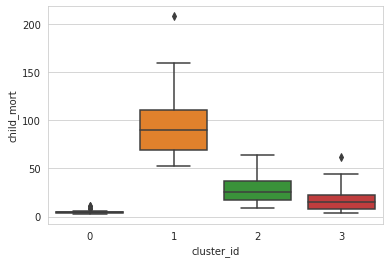

In [208]:
sns.boxplot(x= 'cluster_id', y= 'child_mort', data= cluster_df)

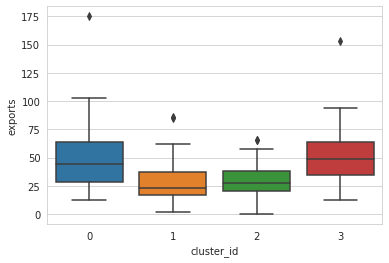

In [209]:
sns.boxplot(x= 'cluster_id', y= 'exports', data= cluster_df)

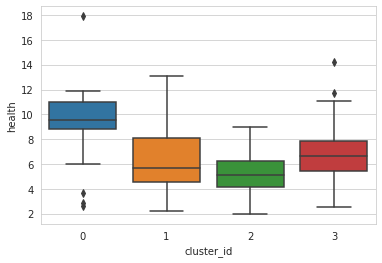

In [210]:
sns.boxplot(x= 'cluster_id', y= 'health', data= cluster_df)

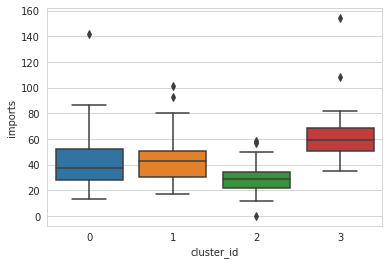

In [211]:
sns.boxplot(x= 'cluster_id', y= 'imports', data= cluster_df)

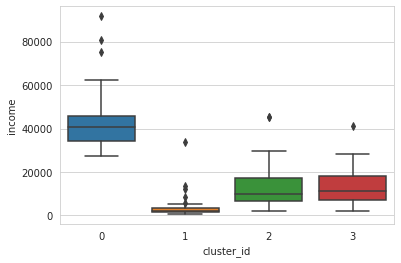

In [212]:
sns.boxplot(x= 'cluster_id', y= 'income', data= cluster_df)

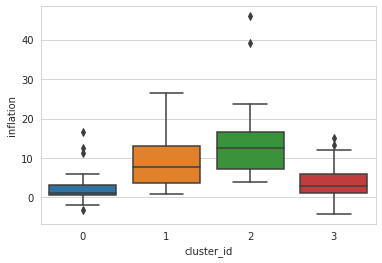

In [213]:
sns.boxplot(x= 'cluster_id', y= 'inflation', data= cluster_df)

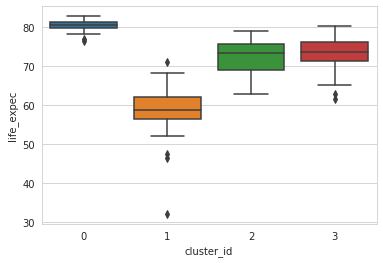

In [214]:
sns.boxplot(x= 'cluster_id', y= 'life_expec', data= cluster_df)

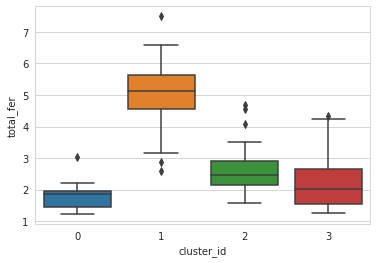

In [215]:
sns.boxplot(x= 'cluster_id', y= 'total_fer', data= cluster_df)

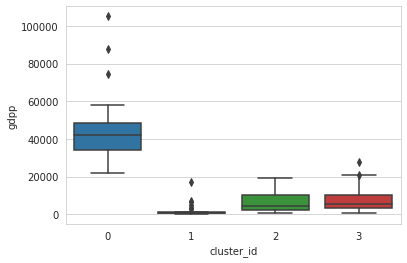

In [216]:
sns.boxplot(x= 'cluster_id', y= 'gdpp', data= cluster_df)

## Hierarchical clustering

In [219]:
df_final.head()

,PC1,PC2,PC3,PC4,cluster_id,country
0,-2.966365,0.014543,-1.036420,0.768485,2.0,Afghanistan
1,0.442288,-0.507039,0.022429,-1.284641,1.0,Albania
2,-0.365026,-0.641205,1.663468,-0.247008,0.0,Algeria
3,-3.109768,1.420818,1.634979,1.711483,2.0,Angola
4,1.101124,0.286844,0.019053,-0.911061,1.0,Antigua and Barbuda


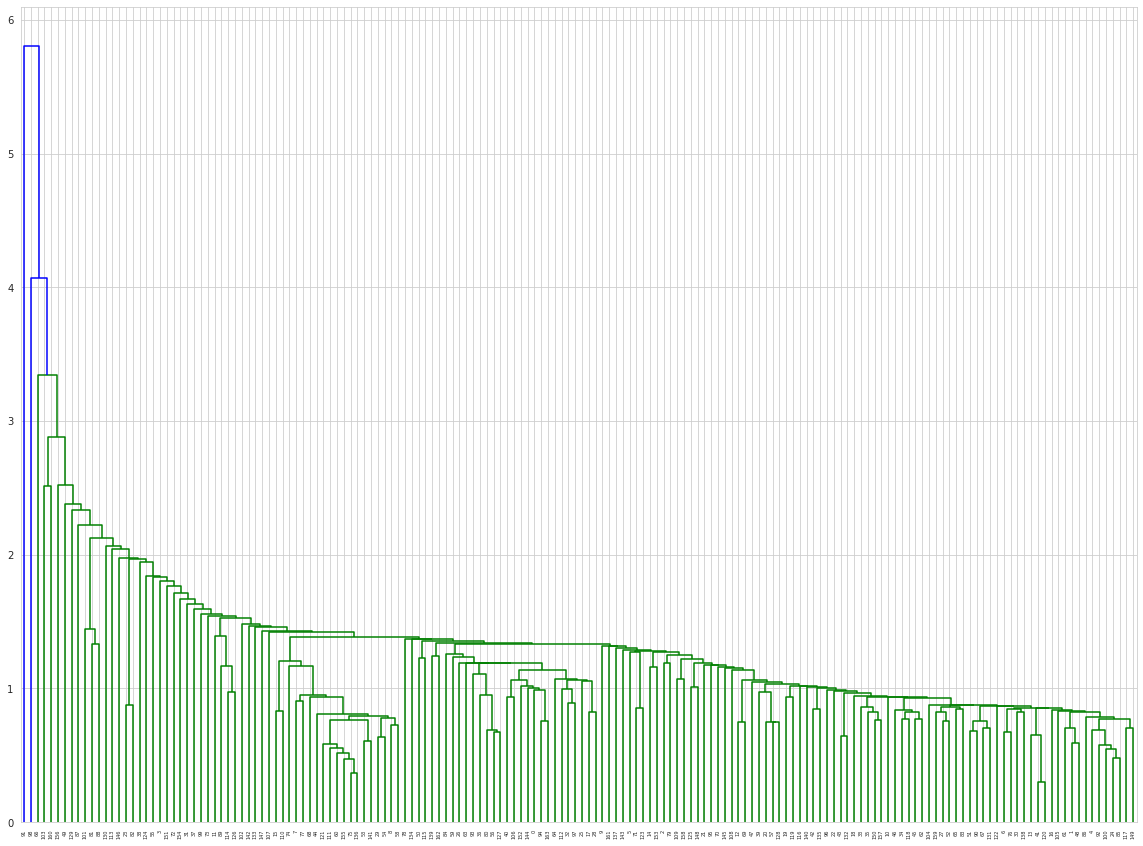

In [224]:
# 1.single linkage
plt.figure(figsize=(20,15))
mergings = linkage(x, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

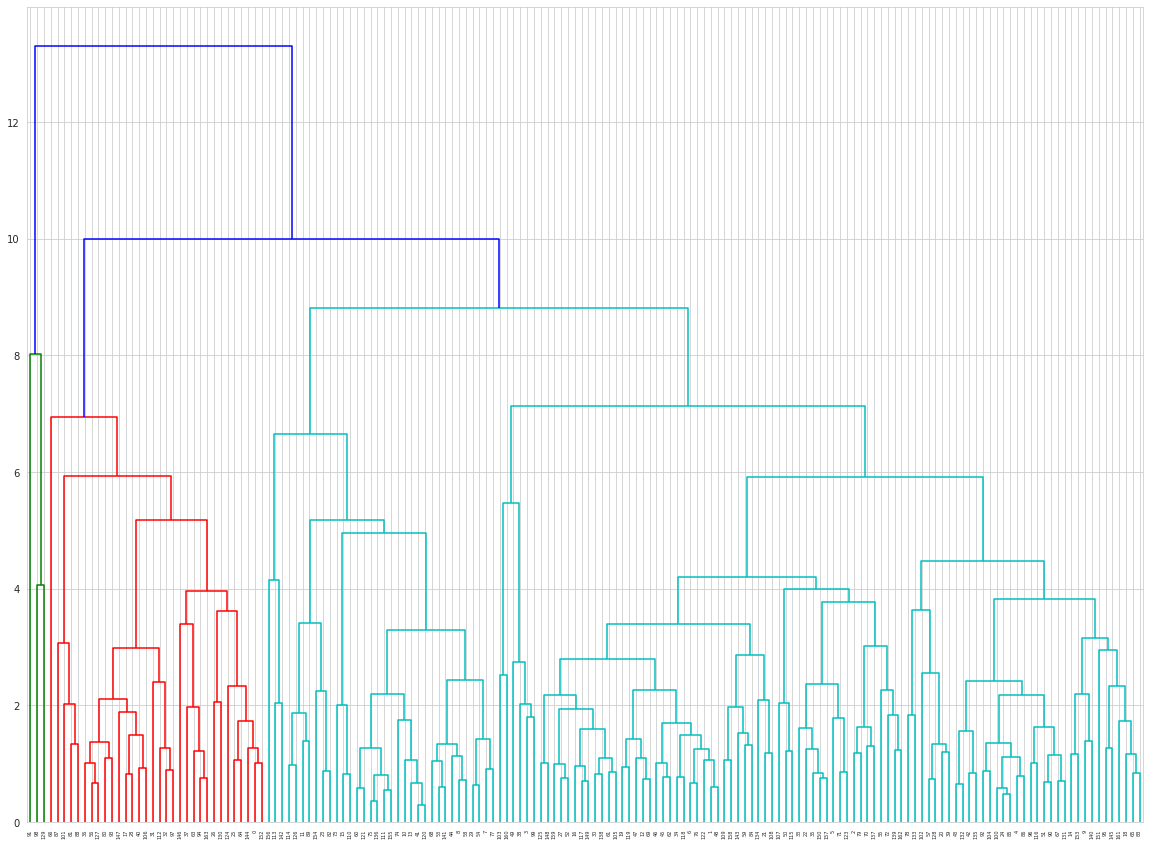

In [226]:
# 2.complete linkage
plt.figure(figsize=(20,15))
mergings = linkage(x, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Optimal clusters selected- 4

In [236]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0,
       0, 2, 1, 3, 1, 0, 0, 1, 1, 0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 3, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [241]:
# assign cluster labels.
df['cluster_labels'] = cluster_labels
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1


In [242]:
hei_cluster= pd.concat([df, y], axis=1)
hei_cluster.head(15)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels,country
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,0,Afghanistan
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,3,1,Albania
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,1,Algeria
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1,Angola
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,3,1,Antigua and Barbuda
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,1,Argentina
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,1,Armenia
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,2,Australia
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,2,Austria
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2,1,Azerbaijan


### Plots

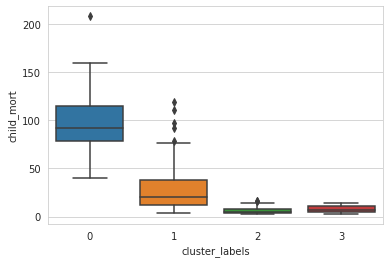

In [243]:
sns.boxplot(x= 'cluster_labels', y= 'child_mort', data= hei_cluster)

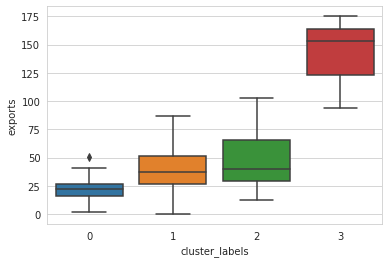

In [244]:
sns.boxplot(x= 'cluster_labels', y= 'exports', data= hei_cluster)

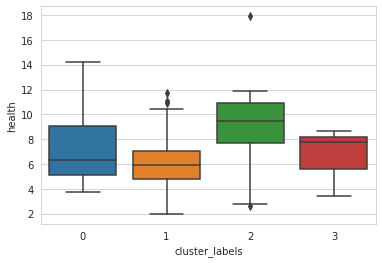

In [245]:
sns.boxplot(x= 'cluster_labels', y= 'health', data= hei_cluster)

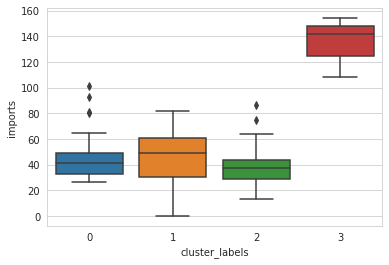

In [246]:
sns.boxplot(x= 'cluster_labels', y= 'imports', data= hei_cluster)

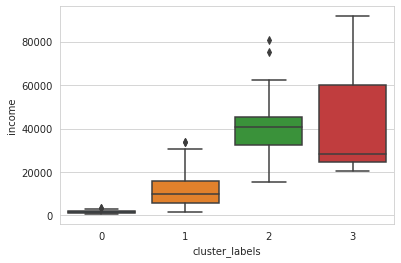

In [247]:
sns.boxplot(x= 'cluster_labels', y= 'income', data= hei_cluster)

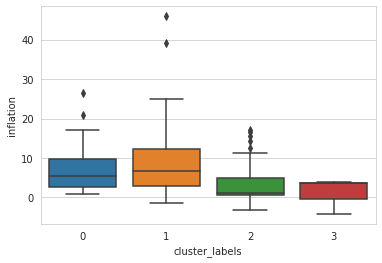

In [248]:
sns.boxplot(x= 'cluster_labels', y= 'inflation', data= hei_cluster)

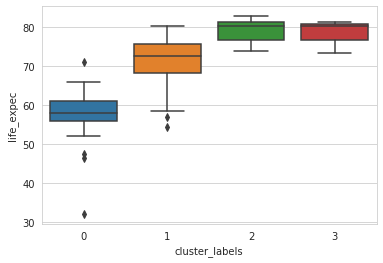

In [249]:
sns.boxplot(x= 'cluster_labels', y= 'life_expec', data= hei_cluster)

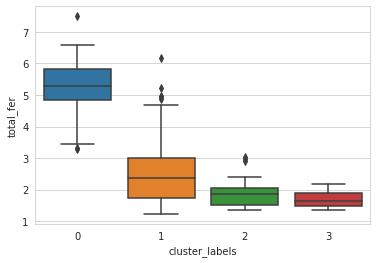

In [250]:
sns.boxplot(x= 'cluster_labels', y= 'total_fer', data= hei_cluster)

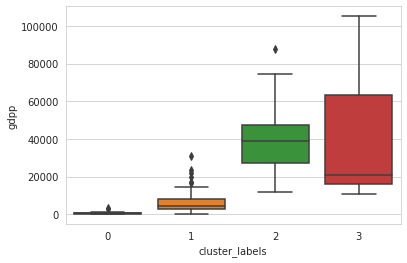

In [251]:
sns.boxplot(x= 'cluster_labels', y= 'gdpp', data= hei_cluster)

In [255]:
hei_cluster.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'cluster_id', 'cluster_labels',
       'country'],
      dtype='object')

### Group based on the mean values 

In [0]:
avg_child_mortality = pd.DataFrame(hei_cluster.groupby(["cluster_labels"]).child_mort.mean())
avg_export = pd.DataFrame(hei_cluster.groupby(["cluster_labels"]).exports.mean())
avg_health = pd.DataFrame(hei_cluster.groupby(["cluster_labels"]).health.mean())
avg_imports = pd.DataFrame(hei_cluster.groupby(["cluster_labels"]).imports.mean())
avg_income = pd.DataFrame(hei_cluster.groupby(["cluster_labels"]).income.mean())
avg_inflation = pd.DataFrame(hei_cluster.groupby(["cluster_labels"]).inflation.mean())
avg_life_expectency = pd.DataFrame(hei_cluster.groupby(["cluster_labels"]).life_expec.mean())
avg_fertility_rate = pd.DataFrame(hei_cluster.groupby(["cluster_labels"]).total_fer.mean())
avg_gdp = pd.DataFrame(hei_cluster.groupby(["cluster_labels"]).gdpp.mean())

In [265]:
avg_df= pd.concat([pd.Series(list(range(0,5))), avg_child_mortality, avg_export, avg_health, avg_imports, avg_income, avg_inflation, avg_life_expectency, avg_fertility_rate, avg_gdp], axis=1)
avg_df.columns = ["cluster_labels","average_mortality", "average_export", "average_health", "aversge_imports", "average_income", "average_inflation","average_life_expecancy", "average_fertility", "average_gdp"]
avg_df

,cluster_labels,average_mortality,average_export,average_health,aversge_imports,average_income,average_inflation,average_life_expecancy,average_fertility,average_gdp
0,0,99.725000,22.950625,7.287812,45.412500,1653.843750,7.321719,57.818750,5.267500,858.750000
1,1,29.613684,40.738726,6.067579,46.492273,11437.789474,8.664684,71.328421,2.578211,6173.726316
2,2,6.494118,45.623529,8.762647,39.455882,40617.647059,3.763294,79.373529,1.900000,38085.294118
3,3,8.000000,140.600000,6.606667,134.666667,46800.000000,1.080000,78.333333,1.720000,45633.333333
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualize the data with respect to cluster labels

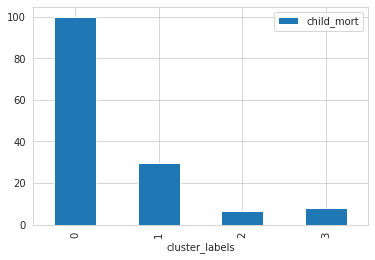

In [275]:
avg_child_mortality.plot.bar()

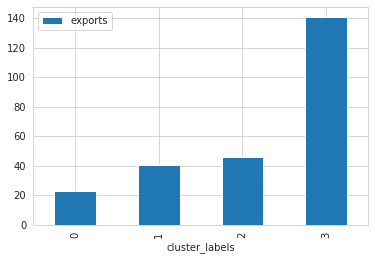

In [276]:
avg_export.plot.bar()

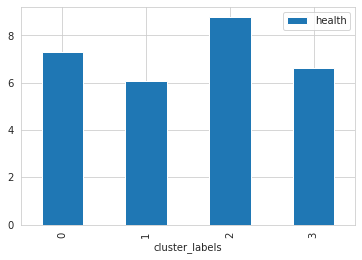

In [277]:
avg_health.plot.bar()

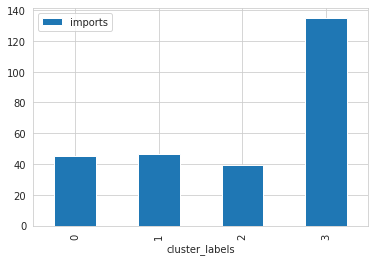

In [278]:
avg_imports.plot.bar()

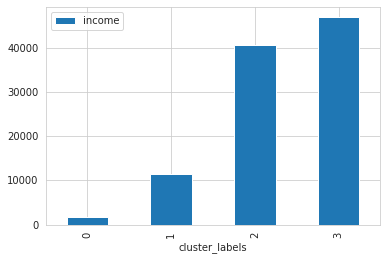

In [279]:
avg_income.plot.bar()

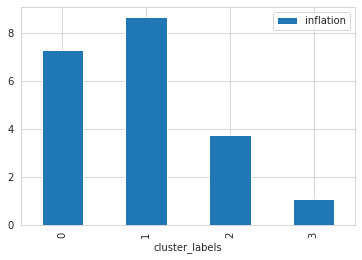

In [280]:
avg_inflation.plot.bar()

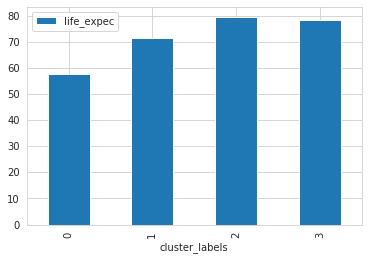

In [282]:
avg_life_expectency.plot.bar()

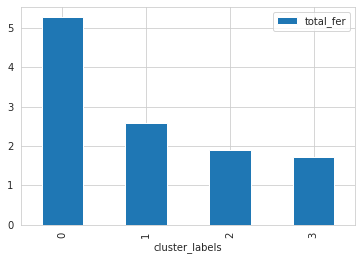

In [284]:
avg_fertility_rate.plot.bar()

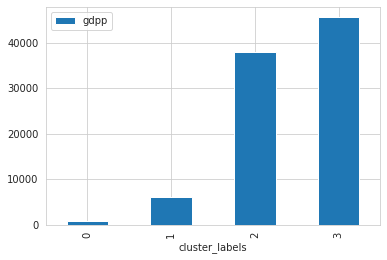

In [285]:
avg_gdp.plot.bar()

## Insights from the data

### From the above clustering, we can see that in case of cluster number Zero(0):


1.   Average child mortality rate is High.
2.   Average Inflation rate is High.

### Also for the cluster number Zero(0):


> The Average Export, Health, Imports, Income, Life-expectency & GDP is low.

Hence we should focus on the countries belonging to cluster- Zero(0).






In [0]:
avg_df= pd.concat([avg_df, y], axis=1)

In [293]:
hei_cluster[hei_cluster.cluster_labels == 0].country.values

array(['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       "Cote d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Niger', 'Rwanda',
       'Senegal', 'Sierra Leone', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Zambia'], dtype=object)

# Recomendations

### Countries belonging to cluster (0) are need to be focused more.
### Countries:


> 'Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       "Cote d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Niger', 'Rwanda',
       'Senegal', 'Sierra Leone', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Zambia'



